# Pix2pix Training

This colab is a modified version of pix2pix.ipynb file taken from the following git repository: https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Additionally testing data was obtained from the following git repository: https://github.com/TheLethargicOwl/Single-Image-De-Raining-Keras

A combination of the code repository and the data is made in our forked repository: https://github.com/trishath/pytorch-CycleGAN-and-pix2pix.git

Link to the trained model on drive https://drive.google.com/drive/folders/1FMVDmNVoln3WqyhUdBDyf9_XoFSAUNai?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# Install Required Directories

In [ ]:
!git clone https://github.com/trishath/pytorch-CycleGAN-and-pix2pix.git

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 3171, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 3171 (delta 3), reused 0 (delta 0), pack-reused 3153
Receiving objects: 100% (3171/3171), 102.60 MiB | 16.45 MiB/s, done.
Resolving deltas: 100% (1515/1515), done.


In [ ]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 686kB 14.6MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp37-none-any.whl size=655251 sha256=163d41cb7924c5fcf4f4fd6efd9f4911f6427899fbe833c73d96676b062f8463
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp37-none-any.whl size=5713 sha256=3e04a4ffd71e4efb68a86f72e88f31b3ae08a1838d0d57606515489aedf21a41
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile


# Pretrained models (Use Facade Model)

**Provided documentation:** (https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix)
Download one of the official pretrained models with:

-   `bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt` 




In [ ]:
!bash ./scripts/download_pix2pix_model.sh facades_label2photo

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [facades_label2photo]
for details.

--2021-04-20 23:03:31--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704720 (208M)
Saving to: ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’

./checkpoints/facad 100%[===================>] 207.62M  1.82MB/s    in 83s     

2021-04-20 23:04:55 (2.50 MB/s) - ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’ saved [217704720/217704720]



# Training Block

**Provided documentation: (https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix)**
-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

**Our modification**
- Called the `scale_width_and_crop` to resize the images 
- Use direction B to A direction, which is training for learning the translation from rain images to normal weather. 
- The training runs for 200 epochs. 

In [ ]:
!python train.py --dataroot /content/pytorch-CycleGAN-and-pix2pix/data/rain --name facades_pix2pix --model pix2pix --direction BtoA --preprocess 'scale_width_and_crop' # bad weather to normal 

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /content/pytorch-CycleGAN-and-pix2pix/data/rain	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest      

**Downloaded and saved the final trained model on the google drive folder**
https://drive.google.com/drive/folders/1FMVDmNVoln3WqyhUdBDyf9_XoFSAUNai?usp=sharing

In [ ]:
!zip -r /content/checkpoints_D.zip /content/pytorch-CycleGAN-and-pix2pix/checkpoints/facades_pix2pix/latest_net_D.pth

  adding: content/pytorch-CycleGAN-and-pix2pix/checkpoints/facades_pix2pix/latest_net_D.pth (deflated 7%)


In [ ]:
!zip -r /content/checkpoints_G.zip /content/pytorch-CycleGAN-and-pix2pix/checkpoints/facades_pix2pix/latest_net_G.pth

  adding: content/pytorch-CycleGAN-and-pix2pix/checkpoints/facades_pix2pix/latest_net_G.pth (deflated 7%)


# Testing

**Provided documentation: (https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix)**
-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

**Our settings**
- Called the DAWN dataset (https://data.mendeley.com/datasets/766ygrbt8y/3)saved on the drive and tested for each of the four weather conditions, Rain, Snow, Fog, and Sand.
- Used above trained model also saved on the drive.

In [ ]:
!python test.py --dataroot /content/gdrive/My\ Drive/CSC413\ Group\ 61/DAWN/Snow --name derained --model test \
                --netG unet_256 --direction BtoA --dataset_mode single --norm batch \
                --checkpoints_dir /content/gdrive/My\ Drive/CSC413\ Group\ 61/ \
                --num_test 205
# Need num_test parameter to run tests on all images in DAWN (instead of just 50)

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content/gdrive/My Drive/CSC413 Group 61/	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: /content/gdrive/My Drive/CSC413 Group 61/DAWN/Snow	[default: None]
             dataset_mode: single                        
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	

In [ ]:
!zip -r /content/results_new.zip /content/pytorch-CycleGAN-and-pix2pix/results

  adding: content/pytorch-CycleGAN-and-pix2pix/results/ (stored 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/derained/ (stored 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/derained/test_latest/ (stored 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/derained/test_latest/images/ (stored 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/derained/test_latest/images/sand_storm-187_fake.png (deflated 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/derained/test_latest/images/snow_storm-225_fake.png (deflated 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/derained/test_latest/images/snow_storm-060_real.png (deflated 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/derained/test_latest/images/mist-147_real.png (deflated 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/derained/test_latest/images/snow_storm-166_fake.png (deflated 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/derained/test_la

# Visualize Generated Images

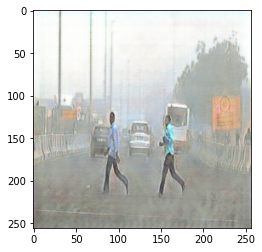

In [ ]:
import matplotlib.pyplot as plt
# dust storm generated deweathered image
img = plt.imread('/content/gdrive/MyDrive/CSC413 Group 61/results/derained/test_latest/images/dusttornado-015_fake.png')
plt.imshow(img)

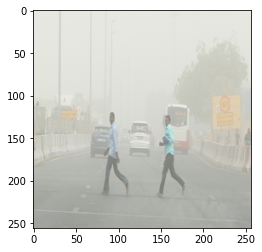

In [ ]:
# real image 
img = plt.imread('/content/gdrive/MyDrive/CSC413 Group 61/results/derained/test_latest/images/dusttornado-015_real.png')
plt.imshow(img)

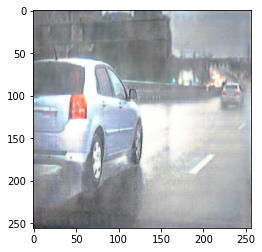

In [ ]:
# generated deweathered image for fog 
img = plt.imread('/content/gdrive/MyDrive/CSC413 Group 61/results/derained/test_latest/images/foggy-043_fake.png')
plt.imshow(img)

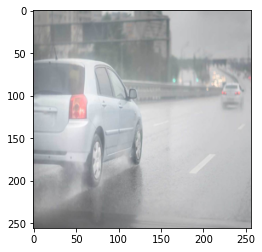

In [ ]:
# real foggy image
img = plt.imread('/content/gdrive/MyDrive/CSC413 Group 61/results/derained/test_latest/images/foggy-043_real.png')
plt.imshow(img)

In [ ]:
# generated deweathered image for fog 
img = plt.imread('/content/gdrive/MyDrive/CSC413 Group 61/results/derained/test_latest/images/foggy-043_fake.png')
plt.imshow(img)

In [ ]:
# generated deweathered image for rain 
img = plt.imread('/content/gdrive/MyDrive/CSC413 Group 61/results/derained/test_latest/images/foggy-043_fake.png')
plt.imshow(img)

# Generating Loss Plot

Saved a pix2pix_losses.txt file on the drive to generate the plot. 

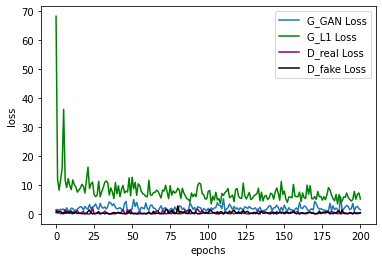

In [ ]:
import matplotlib.pyplot as plt

ggan_loss = []
gl1_loss = []
dreal_loss = []
dfake_loss = []

with open('/content/gdrive/MyDrive/CSC413 Group 61/pix2pix_losses.txt') as f:
  for i, row in enumerate(f.readlines()):
    info = row.split()
   
    if '700,' in info:
      # print(i)
      ggan_loss.append(float(info[9]))
      gl1_loss.append(float(info[11]))
      dreal_loss.append(float(info[13]))
      dfake_loss.append(float(info[15]))

plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(list(range(len(ggan_loss))), ggan_loss, label='G_GAN Loss')
plt.plot(list(range(len(ggan_loss))), gl1_loss, color='green', label='G_L1 Loss')
plt.plot(list(range(len(ggan_loss))), dreal_loss, color='purple', label='D_real Loss')
plt.plot(list(range(len(ggan_loss))), dfake_loss, color='black', label='D_fake Loss')
plt.legend()